# Лабораторная работа 4
# + Бонус
# + Ср 1, 2, 3
## Предсказание цен на недвижимость

## Выполнил: __Щеткин Дмитрий Сергеевич__

группа 2.1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
%%capture
!wget https://www.dropbox.com/s/afwb0tnqm9izxha/predict_house_price_training_data.xlsx
!wget https://www.dropbox.com/s/sur2avqf4n5f4az/predict_house_price_test_data.xlsx

In [3]:
training_data = pd.read_excel('predict_house_price_training_data.xlsx')

In [4]:
training_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,830000,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,385000,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,610000,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,550000,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,1300000,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


In [5]:
training_data.shape

(15129, 16)

In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         15129 non-null  int64  
 1   Спальни              15129 non-null  int64  
 2   Ванные               15129 non-null  float64
 3   Жилая площадь        15129 non-null  int64  
 4   Общая площадь        15129 non-null  int64  
 5   Количество этажей    15129 non-null  float64
 6   Вид на воду          15129 non-null  int64  
 7   Просмотрены ранее    15129 non-null  int64  
 8   Состояние            15129 non-null  int64  
 9   Оценка риелтора      15129 non-null  int64  
 10  Площадь без подвала  15129 non-null  int64  
 11  Площадь подвала      15129 non-null  int64  
 12  Год постройки        15129 non-null  int64  
 13  Год реновации        15129 non-null  int64  
 14  Широта               15129 non-null  float64
 15  Долгота              15129 non-null 

In [7]:
target_variable_name = 'Целевая.Цена'
training_values = training_data[target_variable_name]
training_points = training_data.drop(target_variable_name, axis=1)
training_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


In [8]:
from sklearn import linear_model, ensemble

In [9]:
linear_regression_model = linear_model.LinearRegression()
linear_regression_model

LinearRegression()

In [10]:
random_forest_model = ensemble.RandomForestRegressor()
random_forest_model

RandomForestRegressor()

In [11]:
linear_regression_model.fit(training_points, training_values)

LinearRegression()

In [12]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor()

In [13]:
test_data = pd.read_excel('predict_house_price_test_data.xlsx')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         6484 non-null   int64  
 1   Спальни              6484 non-null   int64  
 2   Ванные               6484 non-null   float64
 3   Жилая площадь        6484 non-null   int64  
 4   Общая площадь        6484 non-null   int64  
 5   Количество этажей    6484 non-null   float64
 6   Вид на воду          6484 non-null   int64  
 7   Просмотрены ранее    6484 non-null   int64  
 8   Состояние            6484 non-null   int64  
 9   Оценка риелтора      6484 non-null   int64  
 10  Площадь без подвала  6484 non-null   int64  
 11  Площадь подвала      6484 non-null   int64  
 12  Год постройки        6484 non-null   int64  
 13  Год реновации        6484 non-null   int64  
 14  Широта               6484 non-null   float64
 15  Долгота              6484 non-null   f

In [14]:
test_values = test_data[target_variable_name]
test_points = test_data.drop(target_variable_name, axis=1)

In [15]:
test_predictions_linear = linear_regression_model.predict(test_points)
test_predictions_random_forest = random_forest_model.predict(test_points)

In [16]:
%matplotlib inline

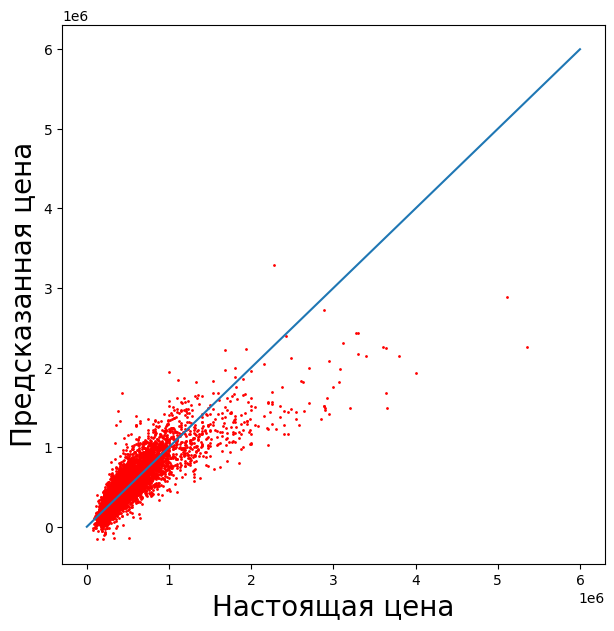

In [17]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear, s=1, c='r')
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

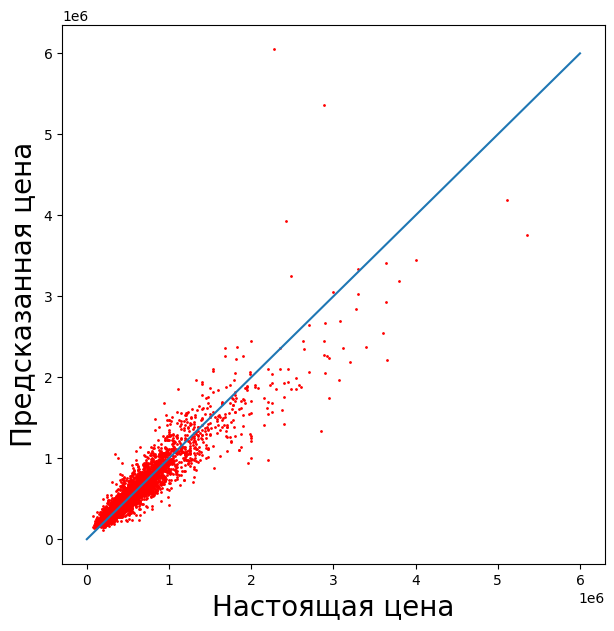

In [18]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest, s=1, c='r')
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
print(mean_absolute_error_linear_model)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)
print(mean_squared_error_linear_model)

126852.51255004793
40756843765.10087


In [21]:
mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
print(mean_absolute_error_random_forest_model)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)
print(mean_squared_error_random_forest_model)

70440.68354730692
18795932741.745743


In [22]:
import numpy as np

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model,
        np.sqrt(mean_squared_error_linear_model)))

print("MAE: {0:7.2f}, MSE: {1:7.2f}, RMSE: {2:7.2f} для модели случайного леса".format(
       mean_absolute_error_random_forest_model,
       mean_squared_error_random_forest_model,
       mean_squared_error_random_forest_model**(1/2)))

MAE: 126852.51, RMSE: 201883.24 для модели линейной регрессии
MAE: 70440.68, MSE: 18795932741.75, RMSE: 137098.26 для модели случайного леса


## 6. Бонус: Выявление важных признаков

In [23]:
training_points.head(5)

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


In [24]:
training_points['Год реновации'].value_counts()

,count
Год реновации,
0,14490
2014,63
2013,31
2000,28
2003,24
...,...
1950,1
1954,1
1946,1


In [25]:
random_forest_model = ensemble.RandomForestRegressor()
random_forest_model.fit(training_points, training_values)

RandomForestRegressor()

In [26]:
random_forest_model.feature_importances_

array([0.0040599 , 0.01045868, 0.30491863, 0.02518021, 0.00248813,
       0.02852417, 0.0155607 , 0.00404886, 0.29420325, 0.02605776,
       0.00699934, 0.03114824, 0.00282036, 0.17221806, 0.07131374])

In [27]:
training_points.keys()

Index(['Спальни', 'Ванные', 'Жилая площадь', 'Общая площадь',
       'Количество этажей', 'Вид на воду', 'Просмотрены ранее', 'Состояние',
       'Оценка риелтора', 'Площадь без подвала', 'Площадь подвала',
       'Год постройки', 'Год реновации', 'Широта', 'Долгота'],
      dtype='object')

In [28]:
feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])
feature_importance['Название признака'] = training_points.keys()
feature_importance['Важность признака'] = random_forest_model.feature_importances_
feature_importance

,Название признака,Важность признака
0,Спальни,0.004060
1,Ванные,0.010459
2,Жилая площадь,0.304919
3,Общая площадь,0.025180
4,Количество этажей,0.002488
5,Вид на воду,0.028524
6,Просмотрены ранее,0.015561
7,Состояние,0.004049
8,Оценка риелтора,0.294203
9,Площадь без подвала,0.026058


In [29]:
feature_importance.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
2,Жилая площадь,0.304919
8,Оценка риелтора,0.294203
13,Широта,0.172218
14,Долгота,0.071314
11,Год постройки,0.031148
5,Вид на воду,0.028524
9,Площадь без подвала,0.026058
3,Общая площадь,0.025180
6,Просмотрены ранее,0.015561
1,Ванные,0.010459


## 5 наиболее и наименее значимых признаков
### Как видно, наиболее значимые признаки - это:
- Жилая площадь
- Оценка риелтора
- Широта
- Долгота
- Год постройки

### Наименее важны такие признаки, как
- Год реновации
- Количество этажей
- Состояние
- Спальни
- Площадь подвала

# Самостоятельная работа


## 1
Исключите из выборки незначащие параметры (фичи), стоящие в рейтинге фич на последних местах и посмотрите, оцените насколько ухудшилось/улучшилось качество моделей (rmse, mse, mae). Напишите об этом отчет с цифрами.

In [30]:
training_data = pd.read_excel('predict_house_price_training_data.xlsx')
test_data = pd.read_excel('predict_house_price_test_data.xlsx')

features_to_drop = ['Спальни', 'Состояние', 'Количество этажей', 'Год реновации']

training_data = training_data.drop(columns=features_to_drop)
test_data = test_data.drop(columns=features_to_drop)

In [31]:
training_values = training_data[target_variable_name]
training_points = training_data.drop(target_variable_name, axis=1)

In [32]:
random_forest_model = ensemble.RandomForestRegressor()
random_forest_model.fit(training_points, training_values)

RandomForestRegressor()

In [33]:
test_values = test_data[target_variable_name]
test_points = test_data.drop(target_variable_name, axis=1)

In [34]:
test_predictions_random_forest = random_forest_model.predict(test_points)

In [35]:
mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
print(mean_absolute_error_random_forest_model)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)
print(mean_squared_error_random_forest_model)

70814.81213134406
18538661315.61031


In [36]:
print("MAE: {0:7.2f}, MSE: {1:7.2f}, RMSE: {2:7.2f} для модели случайного леса".format(
       mean_absolute_error_random_forest_model,
       mean_squared_error_random_forest_model,
       mean_squared_error_random_forest_model**(1/2)))

MAE: 70814.81, MSE: 18538661315.61, RMSE: 136156.75 для модели случайного леса


После удаления 4 признаков с наименьшей важностью (Спальни, Состояние, Количество этажей, Год реновации) качество модели немного улучшилось по всем метрикам.

##2
Исследуйте параметры модели Random Forest и постарайтесь получить ещё более низкое (чем в текущей реализации) значение ошибки для этой модели.

In [37]:
training_data = pd.read_excel('predict_house_price_training_data.xlsx')
test_data = pd.read_excel('predict_house_price_test_data.xlsx')

training_values = training_data[target_variable_name]
training_points = training_data.drop(target_variable_name, axis=1)

test_values = test_data[target_variable_name]
test_points = test_data.drop(target_variable_name, axis=1)

In [38]:
random_forest_model = ensemble.RandomForestRegressor(
    n_estimators = 200,         # увеличение числа деревьев
    max_features = 0.5,         # использование стохастического леса
    n_jobs = -1                 # использование всех ядер процессора
    )
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(max_features=0.5, n_estimators=200, n_jobs=-1)

In [39]:
test_predictions_random_forest = random_forest_model.predict(test_points)

mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)

print("MAE: {0:7.2f}, MSE: {1:7.2f}, RMSE: {2:7.2f} для модели случайного леса с иследованием параметров".format(
       mean_absolute_error_random_forest_model,
       mean_squared_error_random_forest_model,
       mean_squared_error_random_forest_model**(1/2)))

MAE: 70648.16, MSE: 17925568441.35, RMSE: 133886.40 для модели случайного леса с иследованием параметров


Таким образом, исследуя параметры модели Random Forest, можно сказать, что:

Изменение данных параметров привело к улучшению модели:
- n_estimators - количество деревьев в лесу
- max_features - количество признаков для разбиения узла
- n_jobs - количество ядер процессора

Изменение данных параметров привело к ухудшению модели:
- max_depth - максимальная глубина каждого дерева
- min_samples_split - минимальное количество образцов в узле
- min_samples_leaf - минимальное количество образцов в листе дерева


## 3
Исследуйте другие модели для реализации задачи предсказания (https://habr.com/ru/company/mailru/blog/513842/). Постарайтесь построить более точную модель.

## Нейросетевая регрессия

In [40]:
from sklearn.neural_network import MLPRegressor

In [41]:
mlp_model = MLPRegressor(max_iter=2000, random_state=42)
mlp_model.fit(training_points, training_values)

MLPRegressor(max_iter=2000, random_state=42)

In [42]:
test_predictions_mlp = mlp_model.predict(test_points)

mean_absolute_error_mlp_model = mean_absolute_error(test_values, test_predictions_mlp)
mean_squared_error_mlp_model = mean_squared_error(test_values, test_predictions_mlp)

print("MAE: {0:7.2f}, MSE: {1:7.2f}, RMSE: {2:7.2f} для модели нейросетевой регрессии".format(
       mean_absolute_error_mlp_model,
       mean_squared_error_mlp_model,
       mean_squared_error_mlp_model**(1/2)))

MAE: 151366.85, MSE: 54194480496.71, RMSE: 232797.08 для модели нейросетевой регрессии


## Регрессия дерева решений

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(training_points, training_values)

DecisionTreeRegressor(random_state=42)

In [45]:
test_predictions_dt = dt_model.predict(test_points)

mean_absolute_error_dt_model = mean_absolute_error(test_values, test_predictions_dt)
mean_squared_error_dt_model = mean_squared_error(test_values, test_predictions_dt)

print("MAE: {0:7.2f}, MSE: {1:7.2f}, RMSE: {2:7.2f} для модели регрессии дерева решений".format(
       mean_absolute_error_dt_model,
       mean_squared_error_dt_model,
       mean_squared_error_dt_model**(1/2)))

MAE: 102076.31, MSE: 40123211752.62, RMSE: 200307.79 для модели регрессии дерева решений


## Регрессия Lasso

In [46]:
from sklearn.linear_model import Lasso

In [47]:
lasso_model = Lasso(alpha=0.1, max_iter=100000)
lasso_model.fit(training_points, training_values)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.879e+14, tolerance: 2.033e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, max_iter=100000)

In [48]:
test_predictions_lasso = lasso_model.predict(test_points)

mean_absolute_error_lasso_model = mean_absolute_error(test_values, test_predictions_lasso)
mean_squared_error_lasso_model = mean_squared_error(test_values, test_predictions_lasso)

print("MAE: {0:7.2f}, MSE: {1:7.2f}, RMSE: {2:7.2f} для модели регрессии lasso".format(
       mean_absolute_error_lasso_model,
       mean_squared_error_lasso_model,
       mean_squared_error_lasso_model**(1/2)))

MAE: 126852.41, MSE: 40756828851.63, RMSE: 201883.21 для модели регрессии lasso
